# Rate process theory

This example gives the numerical implementation of the one dimensional rate process theory model (Houlsby & Puzrin, 2006).

The Helmholtz free energy $f$ and the flow potential $w$ for this model are given by:

\begin{align*}
f = & \frac{E}{2} (\epsilon - \alpha)^2 \\
w = & \mu r^2 \left[ \mathrm{cosh} \left( \frac{\left< |\chi| - k \right>}{\mu r} \right) - 1 \right]
\end{align*}

The incremental response follows from a standardised approach, which can be written in the following form:

\begin{equation*}
\begin{Bmatrix}
\dot{\sigma} \\
-\dot{\bar{\chi}}
\end{Bmatrix}= 
\begin{bmatrix}
\frac{\partial^2 f}{\partial \epsilon^2} & \frac{\partial^2 f}{\partial \epsilon \partial \alpha} \\
\frac{\partial^2 f}{\partial \epsilon \partial \alpha} & \frac{\partial^2 f}{\partial \alpha^2} \\
\end{bmatrix} 
\begin{Bmatrix}
\dot{\epsilon} \\
\dot{\alpha}
\end{Bmatrix}
\end{equation*}

The rate of hardening strain is defined by:

\begin{equation*}
\dot{\alpha} = \frac{\partial w}{\partial \chi}
\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def incremental_response_rate_process_theory(E, k, mu, r, epsilon_history, d_t):
    
    # Initialise the model state parameters
    sigma = 0
    chi = 0
    alpha = 0
    
    sigma_history = np.zeros(len(epsilon_history))
    
    d2_f_d_e2 =  E
    d2_f_d_a2 =  E
    d2_f_d_ea = -E
    d2_f_d_ae = -E
    
    epsilon_0 = 0

    # Calculate the incremental response
    for index, epsilon in enumerate(epsilon_history):
    
        d_epsilon = epsilon-epsilon_0
        
        d_w_d_chi = r*np.sign(chi)*np.sinh(np.maximum((np.abs(chi)-k), 0)/(mu*r))

        d_alpha =  d_w_d_chi * d_t
    
        d_sigma = d2_f_d_e2 * d_epsilon + d2_f_d_ea * d_alpha
        d_chi = - (d2_f_d_ae * d_epsilon + d2_f_d_a2 * d_alpha)
    
        sigma = sigma + d_sigma
        chi = chi + d_chi
        alpha = alpha + d_alpha
        epsilon_0 = epsilon
    
        sigma_history[index] = sigma
        
    return sigma_history

In [11]:
# Model parameters
E = 1
k = 1
mu = 0.4
r = 0.1

# Define the applied strain history
epsilon_max_abs = 4
d_epsilon_abs = 0.001
epsilon_history = np.arange(0, epsilon_max_abs, d_epsilon_abs)

dt_1 = d_epsilon_abs / (r * 1000)
dt_2 = d_epsilon_abs / (r * 100)
dt_3 = d_epsilon_abs / (r * 10)
dt_4 = d_epsilon_abs / (r * 1)

sigma_history_1 = incremental_response_rate_process_theory(E, k, mu, r, epsilon_history, dt_1)
sigma_history_2 = incremental_response_rate_process_theory(E, k, mu, r, epsilon_history, dt_2)
sigma_history_3 = incremental_response_rate_process_theory(E, k, mu, r, epsilon_history, dt_3)
sigma_history_4 = incremental_response_rate_process_theory(E, k, mu, r, epsilon_history, dt_4)

Text(0,0.5,'$\\sigma$')

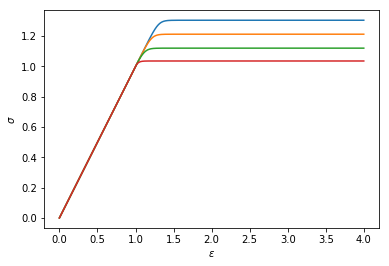

In [12]:
plt.plot(epsilon_history, sigma_history_1)
plt.plot(epsilon_history, sigma_history_2)
plt.plot(epsilon_history, sigma_history_3)
plt.plot(epsilon_history, sigma_history_4)

plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')